# InfoPillar Solution Pvt Ltd | Machine Learning Intern | NOV2021

# AUTHOR = AMAR RAMESH BHADE

# TASK 2=  Fake News Detection Project

### IMPORTING REQUIRED LIBRARY

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
from matplotlib import pyplot as plt

In [54]:
# for warnings
import warnings as wr
wr.filterwarnings("ignore")

### dataset link=https://bit.ly/3FxCSC4

### loading dataset

In [55]:
news_data=pd.read_csv("news.csv")

In [56]:
news_data.head(10)
# for showing 1st 10 results

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [57]:
news_data.tail(10)
#for last 10 results

,Unnamed: 0,title,text,label
6325,8411,Will the Media Reset After the Election or Are...,Written by Peter Van Buren venerable New Yor...,FAKE
6326,6143,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE
6327,3262,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,REAL
6328,9337,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE
6329,8737,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [58]:
#now for checking no. of rows and columns inside the dataset
news_data.shape


(6335, 4)

In [59]:
# for checking null values inside datset
news_data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [60]:
news_data["label"].unique()

array(['FAKE', 'REAL'], dtype=object)

In [61]:
# for checking counts of both REAL AND FAKE

REAL=news_data[news_data.label=="REAL"]

In [62]:
REAL

,Unnamed: 0,title,text,label
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL
...,...,...,...,...
6324,2316,Alabama Lawmaker: Same-Sex Couples Don’t Deser...,Most conservatives who oppose marriage equalit...,REAL
6327,3262,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,REAL
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [63]:
print(REAL.shape)

(3171, 4)


In [64]:
#FOR all FAKE results
FAKE=news_data[news_data.label=="FAKE"]

In [65]:
FAKE

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
...,...,...,...,...
6326,6143,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE
6328,9337,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE
6329,8737,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE


In [66]:
print(FAKE.shape)

(3164, 4)


In [67]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


<AxesSubplot:xlabel='label', ylabel='count'>

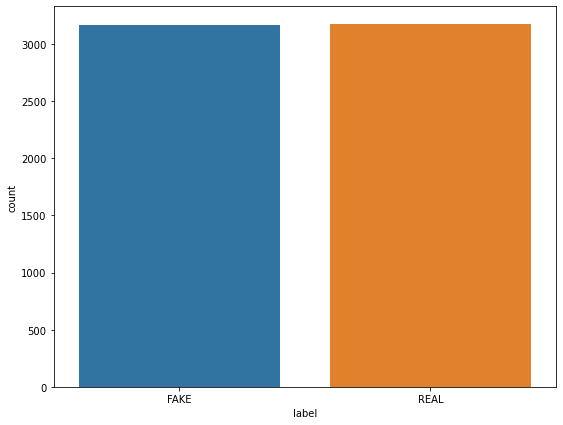

In [68]:
# countplot for label feature

plt.figure(figsize=(9,7))
sns.countplot(news_data["label"])


In [69]:
# now apply train test split for splitting the dataset into training and testing
from sklearn.model_selection import train_test_split

In [70]:
# for that spli data into x and y i.e  dependent and independent feature
x=news_data["text"]
y=news_data["label"]

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.20)

In [141]:
x_train.shape,x_test.shape

((5068,), (1267,))

In [142]:
# apply machine learning algorithm i.e 

from sklearn.feature_extraction.text import TfidfVectorizer

# this algorithm is transform text into a meaningful representation of numbers

In [143]:
# now we Fit and transform the vectorizer on the train set, and transform the vectorizer on the test set.

tv=TfidfVectorizer( stop_words='english', max_df=0.7)
# tv is the object for TfidfVectorizer 

In [144]:
tv.fit_transform(x_train)
tv.transform(x_test)

<1267x61922 sparse matrix of type '<class 'numpy.float64'>'
	with 326139 stored elements in Compressed Sparse Row format>

In [145]:
# now we apply Passive Aggresive Classifier algoritham
from sklearn.linear_model import PassiveAggressiveClassifier

The PassiveAggresive is a linear model and requires One-vs-Rest Classification Strategy to make a prediction. It works by responding as passive for correct classifications and responding as aggressive for any miscalculation

In [146]:
passive_agressive=PassiveAggressiveClassifier(max_iter=50)

In [147]:
passive_agressive.fit(tv.fit_transform(x_train),y_train)

PassiveAggressiveClassifier(max_iter=50)

In [148]:
# now for orediction 

prediction=passive_agressive.predict(tv.transform(x_test))

In [149]:
prediction

array(['REAL', 'FAKE', 'REAL', ..., 'FAKE', 'REAL', 'REAL'], dtype='<U4')

In [150]:
# now we checking the accuracy of the model
from sklearn.metrics import classification_report, accuracy_score

In [151]:
accuracy=accuracy_score(prediction,y_test)

In [152]:
print("accuracy of the model is ",accuracy*100,"%")

accuracy of the model is  94.55406471981057 %


In [153]:
print(f"Classification Report : \n\n{classification_report(y_test,prediction)}")

Classification Report : 

              precision    recall  f1-score   support

        FAKE       0.94      0.95      0.94       603
        REAL       0.95      0.94      0.95       664

    accuracy                           0.95      1267
   macro avg       0.95      0.95      0.95      1267
weighted avg       0.95      0.95      0.95      1267



In [154]:
# now we confusion matrix 
from sklearn.metrics import confusion_matrix

confusion matrix also known as an error matrix, it is specific table layout that given visualization and the performance of an algorithm

In [167]:
confusion_matrix(prediction,y_test,labels=["FAKE","REAL"])

array([[572,  38],
       [ 31, 626]], dtype=int64)

In [168]:
# now we making function that detect weather the news fake or real

In [169]:
def news_detector(news):
    given_input_news=tv.transform([news])
    predict_news=passive_agressive.predict(given_input_news)
    print("this news is ",predict_news)
    

In [179]:
news_detector("Government peace talks negotiator Miriam Coronel-Ferrer said the breakaway rebels may have carried out the attacks to ride on the restiveness fostered by the Islamic State group and to exploit delays in the enforcement of a peace deal signed by the government and the Moro Islamic Liberation Front last year.")

this news is  ['REAL']


In [180]:
news_detector("Azmi Hasan, who has served as facility manager of the Islamic Society of Corona-Norco since 2000.")

this news is  ['FAKE']


In [181]:
news_detector("Senate Minority Leader Harry M. Reid (D-Nev.) has endorsed Sen. Charles E. Schumer (D-N.Y.) to succeed him after he retires at the end of 2016.")

this news is  ['FAKE']


In [182]:
news_detector("Killing Obama administration rules, dismantling Obamacare and pushing through tax reform are on the early to-do list.")

this news is  ['REAL']


In [183]:
news_detector("short time to lose it. Viewers will have to judge in the future whether George is being as unbiased as possible, but theyâ€™ve already rendered their verdict on the mainstream media.")

this news is  ['FAKE']
